In [ ]:
# Importando o Dataset
import zipfile
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [ ]:
from pandas.core.frame import DataFrame
# mbti_file_path = 'https://github.com/hype-usp/Grupos-de-estudos/blob/main/mbti_1.csv.zip?raw=true' # dataset original
mbti_file_path = 'https://github.com/hype-usp/Grupos-de-estudos/blob/main/mbti_tunado.zip?raw=true' # dataset tunado - Laís
mbti_data = pd.read_csv(mbti_file_path, compression='zip')
df = mbti_data

In [ ]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
df['posts']

0       'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1       'I'm finding the lack of me in these posts ver...
2       'Good one  _____   https://www.youtube.com/wat...
3       'Dear INTP,   I enjoyed our conversation the o...
4       'You're fired.|||That's another silly misconce...
                              ...                        
8670    'https://www.youtube.com/watch?v=t8edHB_h908||...
8671    'So...if this thread already exists someplace ...
8672    'So many questions when i do these things.  I ...
8673    'I am very conflicted right now when it comes ...
8674    'It has been too long since I have been on per...
Name: posts, Length: 8675, dtype: object

In [ ]:
df['posts']

0       'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1       'I'm finding the lack of me in these posts ver...
2       'Good one  _____   https://www.youtube.com/wat...
3       'Dear INTP,   I enjoyed our conversation the o...
4       'You're fired.|||That's another silly misconce...
                              ...                        
8670    'https://www.youtube.com/watch?v=t8edHB_h908||...
8671    'So...if this thread already exists someplace ...
8672    'So many questions when i do these things.  I ...
8673    'I am very conflicted right now when it comes ...
8674    'It has been too long since I have been on per...
Name: posts, Length: 8675, dtype: object

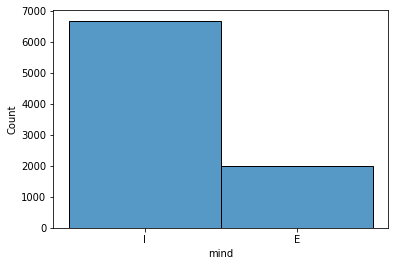

In [ ]:
sbn.histplot(df['mind'])

In [ ]:
X = df['posts']
Y = df['type']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vetorizador = CountVectorizer()
vetorizador.fit(X)
textos_vetorizados = vetorizador.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(textos_vetorizados, Y, test_size = 0.30, random_state=0)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(textos_vetorizados, Y, test_size = 0.30, random_state=0)

In [ ]:
from sklearn import tree

In [ ]:
classificador_arvore_de_decisao = tree.DecisionTreeClassifier()
classificador_arvore_de_decisao = classificador_arvore_de_decisao.fit(X_train, Y_train)

In [ ]:
Y_que_a_gente_previu = classificador_arvore_de_decisao.predict(X_test)

In [ ]:
Y_que_a_gente_previu

array(['ENFP', 'INFJ', 'ENFP', ..., 'INFJ', 'INTP', 'INFP'], dtype=object)

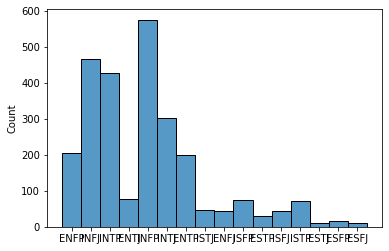

In [ ]:
sbn.histplot(Y_que_a_gente_previu)

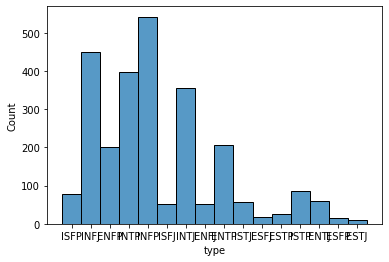

In [ ]:
sbn.histplot(Y_test)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(classificador_arvore_de_decisao, X_test, Y_test, cv=5)

In [ ]:
scores

array([0.44913628, 0.46065259, 0.45681382, 0.5       , 0.49230769])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test, Y_que_a_gente_previu))

              precision    recall  f1-score   support

        ENFJ       0.18      0.15      0.16        53
        ENFP       0.46      0.47      0.46       201
        ENTJ       0.22      0.28      0.25        60
        ENTP       0.40      0.38      0.39       206
        ESFJ       0.20      0.12      0.15        17
        ESFP       0.00      0.00      0.00        14
        ESTJ       0.09      0.10      0.10        10
        ESTP       0.19      0.24      0.21        25
        INFJ       0.53      0.55      0.54       450
        INFP       0.56      0.59      0.57       542
        INTJ       0.50      0.43      0.46       355
        INTP       0.53      0.57      0.55       397
        ISFJ       0.28      0.23      0.25        53
        ISFP       0.32      0.31      0.32        78
        ISTJ       0.35      0.29      0.31        56
        ISTP       0.49      0.42      0.45        86

    accuracy                           0.48      2603
   macro avg       0.33   

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classificador_regressao_logistica = LogisticRegression(solver='liblinear',random_state=0)

In [ ]:
classificador_regressao_logistica.fit(X_train, Y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
Y_predicted = classificador_regressao_logistica.predict(X_test)

In [ ]:
print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

        ENFJ       0.48      0.25      0.33        53
        ENFP       0.56      0.50      0.53       201
        ENTJ       0.43      0.37      0.40        60
        ENTP       0.56      0.51      0.54       206
        ESFJ       1.00      0.12      0.21        17
        ESFP       0.29      0.14      0.19        14
        ESTJ       1.00      0.10      0.18        10
        ESTP       0.73      0.32      0.44        25
        INFJ       0.62      0.69      0.65       450
        INFP       0.64      0.74      0.69       542
        INTJ       0.61      0.59      0.60       355
        INTP       0.58      0.69      0.63       397
        ISFJ       0.67      0.42      0.51        53
        ISFP       0.59      0.38      0.47        78
        ISTJ       0.56      0.34      0.42        56
        ISTP       0.46      0.48      0.47        86

    accuracy                           0.60      2603
   macro avg       0.61   

## Classificar apenas uma das 16 classes ao invés de todas de uma vez

In [ ]:
new_y = df['nature']
new_X_train, new_X_test, new_Y_train, new_Y_test = train_test_split(textos_vetorizados, new_y, test_size = 0.30, random_state=0)
classificador_regressao_logistica.fit(new_X_train, new_Y_train)
y_previsto = classificador_regressao_logistica.predict(new_X_test)
y_previsto
print(classification_report(new_Y_test, y_previsto))

              precision    recall  f1-score   support

           F       0.83      0.82      0.82      1408
           T       0.79      0.80      0.80      1195

    accuracy                           0.81      2603
   macro avg       0.81      0.81      0.81      2603
weighted avg       0.81      0.81      0.81      2603



In [ ]:
new_y = df['mind']
new_X_train, new_X_test, new_Y_train, new_Y_test = train_test_split(textos_vetorizados, new_y, test_size = 0.30, random_state=0)
classificador_regressao_logistica.fit(new_X_train, new_Y_train)
y_previsto = classificador_regressao_logistica.predict(new_X_test)
y_previsto
print(classification_report(new_Y_test, y_previsto))

              precision    recall  f1-score   support

           E       0.67      0.56      0.61       586
           I       0.88      0.92      0.90      2017

    accuracy                           0.84      2603
   macro avg       0.77      0.74      0.75      2603
weighted avg       0.83      0.84      0.83      2603



In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=0)
X_under, y_under = under_sampler.fit_resample(new_X_train, new_Y_train)

In [ ]:
classificador_regressao_logistica.fit(X_under, y_under)
y_previsto = classificador_regressao_logistica.predict(new_X_test)
print(classification_report(new_Y_test, y_previsto))

              precision    recall  f1-score   support

           E       0.50      0.70      0.58       586
           I       0.90      0.80      0.85      2017

    accuracy                           0.78      2603
   macro avg       0.70      0.75      0.72      2603
weighted avg       0.81      0.78      0.79      2603



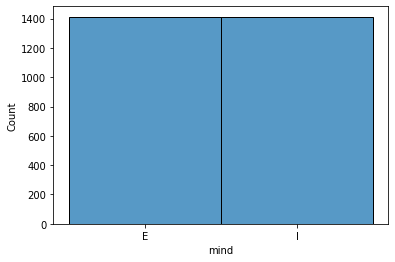

In [ ]:
sbn.histplot(y_under)

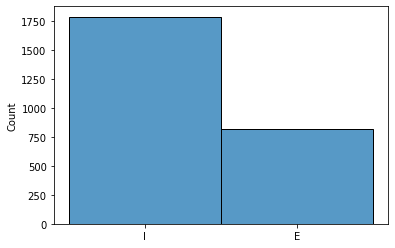

In [ ]:
sbn.histplot(y_previsto)

In [ ]:
classificador_arvore_de_decisao_2 = tree.DecisionTreeClassifier()
classificador_arvore_de_decisao_2 = classificador_arvore_de_decisao_2.fit(X_under, y_under)

In [ ]:
y_dt = classificador_arvore_de_decisao_2.predict(new_X_test)

In [ ]:
print(classification_report(new_Y_test, y_dt))

              precision    recall  f1-score   support

           E       0.38      0.67      0.49       586
           I       0.88      0.68      0.77      2017

    accuracy                           0.68      2603
   macro avg       0.63      0.68      0.63      2603
weighted avg       0.77      0.68      0.70      2603



In [ ]:
y_dt.shape

(2603,)

In [ ]:
df[['posts', 'mind']].head()

,posts,mind
0,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I
1,'I'm finding the lack of me in these posts ver...,E
2,'Good one _____ https://www.youtube.com/wat...,I
3,"'Dear INTP, I enjoyed our conversation the o...",I
4,'You're fired.|||That's another silly misconce...,E


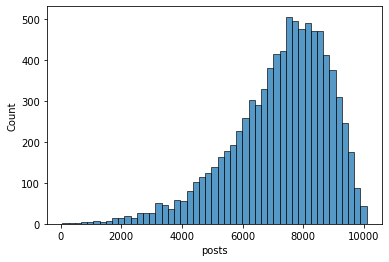

In [ ]:
sbn.histplot(df.posts.str.len())

In [ ]:
vect_char = CountVectorizer(ngram_range=(3, 7), analyzer= 'char')
vect_char.fit(X)
textos_vetorizados = vect_char.transform(X)

In [ ]:
classificador_reg_log_char = LogisticRegression(solver='liblinear',random_state=0)

In [ ]:
new_X_train, new_X_test, new_Y_train, new_Y_test = train_test_split(textos_vetorizados, new_y, test_size = 0.30, random_state=0)

In [ ]:
classificador_reg_log_char.fit(new_X_train, new_Y_train)
y_previsto = classificador_reg_log_char.predict(new_X_test)
y_previsto
print(classification_report(new_Y_test, y_previsto))

              precision    recall  f1-score   support

           E       0.67      0.56      0.61       586
           I       0.88      0.92      0.90      2017

    accuracy                           0.84      2603
   macro avg       0.77      0.74      0.75      2603
weighted avg       0.83      0.84      0.83      2603



--------------------------------

In [ ]:
X = df['posts']
Y = df['mind']

In [ ]:
vect_char = CountVectorizer(analyzer= 'char')
vect_char.fit(X)
textos_vetorizados = vect_char.transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(textos_vetorizados, Y, test_size = 0.30, random_state=0)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=0)
X_under, y_under = under_sampler.fit_resample(X_train, Y_train)

In [ ]:
classificador_regressao_logistica = LogisticRegression(solver='liblinear',random_state=0)
classificador_regressao_logistica.fit(X_under, y_under)
y_previsto = classificador_regressao_logistica.predict(X_test)
y_previsto
print(classification_report(Y_test, y_previsto))

              precision    recall  f1-score   support

           E       0.53      0.72      0.61       586
           I       0.91      0.81      0.86      2017

    accuracy                           0.79      2603
   macro avg       0.72      0.77      0.73      2603
weighted avg       0.82      0.79      0.80      2603



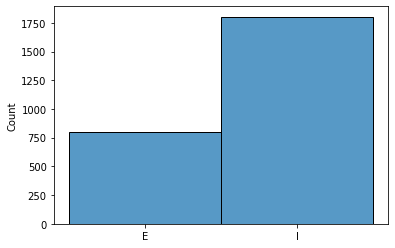

In [ ]:
sbn.histplot(y_previsto)